#  Realestate Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("H:\\dataset\\Boston dataset\\Data.csv")

In [3]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins= 50, figsize=(20,15))
#plt.show()

In [10]:

#def split_train_test(data, test_ratio):
#import numpy as np

 #/   np.random.seed(42)
    # shuffled=np.random.permutation(len(data))
   # print(shuffled)
   # test_set_size = int(len(data)*test_ratio)
   # test_indeces = shuffled[:test_set_size]
   # train_indeces =  shuffled[test_set_size:]
  #  return data.loc[train_indeces], data.iloc[test_indeces]/#


In [11]:
#train_set, test_set = split_train_test(housing, 0.2)

In [12]:
## print( f"Rows in train set:{len(train_set)}\n Rows in test set {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set =  train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set =housing.loc[test_index]

In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null int64
NOX        102 non-null float64
RM         102 non-null float64
AGE        102 non-null float64
DIS        102 non-null float64
RAD        102 non-null int64
TAX        102 non-null int64
PTRATIO    102 non-null float64
B          102 non-null float64
LSTAT      102 non-null float64
MEDV       102 non-null float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [16]:
print(strat_test_set['CHAS'].value_counts() )
print(strat_train_set['CHAS'].value_counts())


0    95
1     7
Name: CHAS, dtype: int64
0    376
1     28
Name: CHAS, dtype: int64


# Correlation

In [17]:
corr_matrix= housing.corr()

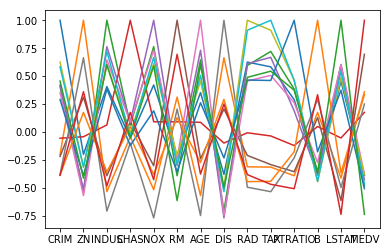

In [18]:
plt.plot(corr_matrix)
plt.show()

In [19]:
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

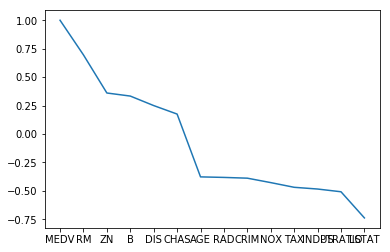

In [20]:
tang= corr_matrix['MEDV'].sort_values(ascending= False)
plt.plot(tang)
plt.show()

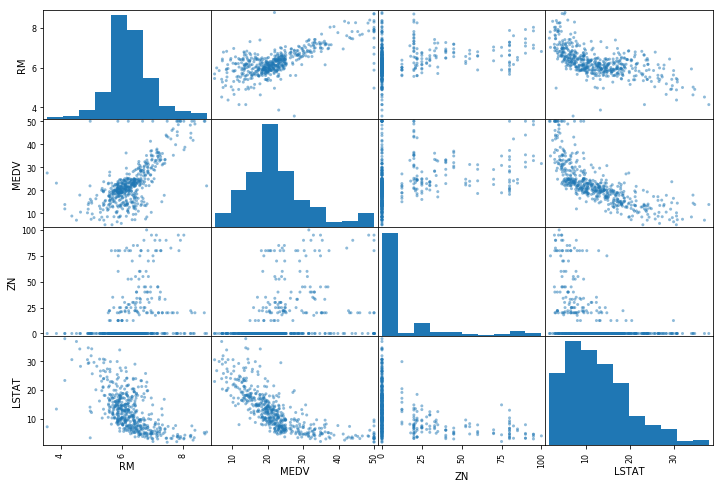

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["RM","MEDV","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

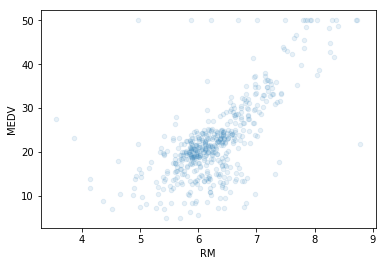

In [22]:
housing.plot(kind="scatter", x= "RM", y="MEDV", alpha=0.1)

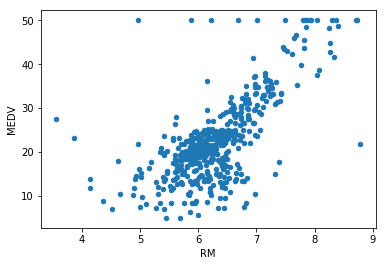

In [23]:
housing.plot(kind="scatter", x= "RM", y="MEDV") # Data is capped on 50

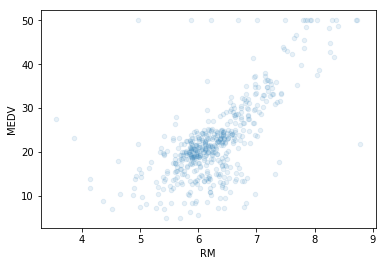

In [24]:
housing.plot(kind="scatter", x= "RM", y="MEDV", alpha=0.1)

# Atrribution combination

In [25]:
housing['TaxRM']= housing['TAX']/housing['RM']

In [26]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TaxRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [27]:
housing =  strat_train_set.drop("MEDV", axis=1)
housing_labels  = strat_train_set["MEDV"].copy()

In [28]:
# dropping na
# housing=housing.dropna(subset=['RM'])
#housing = housing.drp("RM", axis=1) #housing.shape
# a= housing['RM'].median()
#housing['RM'].fillna(a)
# from sklearn.impute import SimpleImputer
# Imputer= Imputer(strategy='median')
#imputer.fit(housing)
#imputer.statistics_

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

my_pipeline= Pipeline([
    ('imputer',Imputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [30]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [31]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting desired model 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model= DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

C:\Users\suwarna\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
some_data=housing.iloc[:5]
some_labels=housing_labels[:5]

In [34]:
prepared_data=my_pipeline.transform(some_data)

In [35]:
model.predict(prepared_data)

array([22.21, 25.56, 15.92, 23.2 , 23.33])

In [36]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing.prediction = model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing.prediction)
lin_mse=np.sqrt(lin_mse)
lin_mse

C:\Users\suwarna\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


1.3497477762181869

In [38]:
# He got 23.3 error, hich was big, mine is less

# Cross Validation for better evaluation

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10 )
rmse_score= np.sqrt(-scores)

In [41]:
rmse_score

array([3.12525862, 2.96870794, 4.89839919, 2.64129218, 3.70502227,
       2.50136863, 4.98319601, 3.17462439, 2.80007053, 4.00407511])

In [42]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard Devation:", scores.std())

In [43]:
print_scores(rmse_score)

('Scores:', array([3.12525862, 2.96870794, 4.89839919, 2.64129218, 3.70502227,
       2.50136863, 4.98319601, 3.17462439, 2.80007053, 4.00407511]))
('Mean:', 3.480201487455568)
('Standard Devation:', 0.8485701729493967)


# Saving the model

In [50]:
#from joblib import dump,load--new
from sklearn.externals import joblib
joblib.dump(model,'Drgon.joblib')


['Drgon.joblib']

# Testing the model

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

(array([25.22, 11.18, 25.95, 20.88, 17.76, 15.78, 19.54, 14.84, 28.09,
       41.46, 20.21, 10.44, 23.27, 24.03, 20.03, 10.99, 31.18, 13.87,
       23.14, 20.73, 20.4 , 17.1 , 14.33, 22.86, 17.24, 31.4 , 15.76,
       32.8 ,  9.59, 32.48, 25.01, 21.71, 22.86, 10.43, 21.65, 11.04,
       43.82, 23.4 , 22.86, 40.21, 24.43, 29.42, 21.07, 20.66, 17.53,
       34.05, 43.14, 20.63, 20.13, 22.27, 22.33, 13.96, 21.09, 14.24,
       25.96, 35.07, 41.55, 29.53, 19.52, 21.2 , 48.16, 10.83, 19.11,
       22.9 , 14.18, 34.22, 19.73, 18.02, 19.14, 34.47, 25.56, 22.56,
       20.68, 22.86, 32.77, 13.42, 16.97, 19.72, 21.19, 21.37, 22.65,
       22.03, 14.84, 23.57, 20.9 , 21.18, 14.29, 20.96, 22.1 , 23.09,
       19.33, 27.18,  7.26, 25.91, 19.52, 29.23, 20.67, 30.21, 14.02,
       26.8 , 20.4 , 18.52]), [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 1

In [55]:
print(final_rmse)

3.1074360530072718


In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])